### ***AUTHORS***
1. Kiprono Ben
2. Norman Mwapea
3. Pauline Kariuki
4. Wesley Owino
5. Judith Otieno
6. Alvin Kipleting

## BUSINESS UNDERSTANDING

### OVERVIEW

This is a Natural Language Processing (NLP)-driven sentiment analysis project designed to decode public opinion on two of the world’s most influential tech companies; **Apple** and **Google**. By leveraging machine learning techniques to analyze thousands of real tweets, the project aims to classify user sentiment as *positive*, *negative*, or *neutral*.  

This initiative demonstrates how social media analytics can provide actionable insights for companies seeking to understand consumer perceptions, monitor brand reputation, and anticipate market trends. Ultimately, the project serves as a prototype for a scalable, intelligent sentiment monitoring system applicable across industries.

### BACKGROUND

Social media has become the world’s largest real-time feedback loop. Millions of users share their thoughts daily about products, services, and brands; creating a goldmine of unstructured data that reveals how people truly feel.  
For technology companies like **Apple** and **Google**, such sentiment can directly influence *brand equity*, *purchase behavior*, and *public trust*. Tweets praising a product’s innovation or criticizing a software update can ripple across digital spaces, shaping collective opinion within hours.  
Understanding these emotional currents is therefore critical for modern businesses. Sentiment analysis transforms raw textual chatter into measurable, strategic insight—empowering companies to react faster, market smarter, and communicate better.

### OBJECTIVES

The main goals of the project are to:

1. Develop a Natural Language Processing (NLP) model that classifies tweets related to Apple and Google as *positive*, *negative*, or *neutral*.  
2. Preprocess and transform raw text into machine-readable features using tokenization, normalization, stopword removal, and TF-IDF vectorization.  
3. Evaluate multiple machine learning algorithms to identify the most accurate and interpretable classifier.  
4. Generate data-driven insights about brand sentiment patterns to support business and marketing decisions.  
5. Lay the groundwork for an automated brand intelligence system capable of tracking sentiment across multiple platforms and industries.

### SUCCESS METRICS

Success will be defined through a mix of technical and business outcomes:

- **Model Performance:** Achieving at least 80% F1-score across sentiment classes.  
- **Data Integrity:** Clean, balanced, and reproducible dataset suitable for future extensions.  
- **Interpretability:** Ability to visualize top sentiment-driving words and phrases for explainability.  
- **Insight Quality:** Sentiment trends that clearly reflect real-world brand perceptions.  
- **Scalability:** Modular design allowing future integration with streaming APIs for live monitoring.

### STAKEHOLDERS

The beneficiaries of this undertaking include:
  
- **Marketing Analysts:** Use sentiment insights to understand public opinion and campaign impact.  
- **Product Managers:** Monitor consumer feedback and sentiment shifts after product launches.  
- **Executives & Decision Makers:** Leverage findings to inform strategic brand and communication strategies.
- **Data Science & NLP Teams:** Responsible for model design, feature engineering, and evaluation.  
- **Research & Development Teams:** Explore applications of the model in broader domains like product reviews, customer feedback, and crisis management.

#### RELEVANCE

TechTones bridges the gap between data and perception. It shows how machine learning can turn the chaos of social media into structured intelligence; helping organizations not only track how people feel, but also why they feel that way.
This project highlights the growing role of NLP in business strategy, reputation management, and competitive intelligence, providing a strong proof of concept for sentiment analysis as a key driver of modern data-driven decision-making.

## DATA UNDERSTANDING
 
The dataset used in this project is sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 Tweets referencing Apple and Google products. Each Tweet has been annotated with information identifying the product or brand mentioned and the emotion expressed toward it. It offers a real-world foundation for supervised sentiment analysis in Natural Language Processing (NLP). 

It contains the following features with their descriptions:

| Feature | Description |
|--------------|----------------|
| tweet_text | The full text of each Tweet referencing Apple or Google products. |
| emotion_in_tweet_is_directed_at | The product or brand mentioned (e.g iPhone, iPad, Google, iPad/iPhone App). |
| is_there_an_emotion_directed_at_a_brand_or_product | The annotated sentiment label -> *Positive emotion*, *Negative emotion*, or *No emotion toward brand or product*. |

This schema supports a supervised learning setup where tweet_text acts as the input feature and is_there_an_emotion_directed_at_a_brand_or_product serves as the target variable for classification.

Awesome! Now, let's get our hands dirty.

### EXPLORING THE DATA

We begin by loading the data and performing an initial exploration to get a sense of its structure and content. But first, we gather our essential tools; just as a painter readies their palette and brushes before creating a masterpiece.

In [506]:
# ======= [Import all relevant libraries] =======

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud     # Word Cloud

# String manipulation
import re

# Counting items
from collections import Counter

# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import RegexpTokenizer                   # Tokenization
from nltk.corpus import stopwords                           # Stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer      # Stemming & Lemmatization

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Pipelines
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression         # Logistic Regression
from sklearn.tree import DecisionTreeClassifier             # Decision Tree

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc,
    classification_report
)

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now we load the data.

In [507]:
df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\TechTones\\Apple and Google Twitter Sentiments.csv", encoding="ISO-8859-1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product


*Observation:* The dataset is consistent and admittedly very messy.

Then we check the number of records and fatures we are working with.

In [508]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} features.")

The dataset has 9093 records and 3 features.


We’ve got over 9,000 records, a solid data haul. Let’s see how unique the dataset is.


In [509]:
# ======= [Dataset Uniqueness] =======

# Number of unique values in each column
print("Number of unique values in:", '\n')
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Unique values in each column
print("\nUnique Values in:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())

Number of unique values in: 

tweet_text: 9065 unique values
emotion_in_tweet_is_directed_at: 9 unique values
is_there_an_emotion_directed_at_a_brand_or_product: 4 unique values

Unique Values in:

tweet_text:
['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev"
 'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.'
 '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tes

*Observation:*

- There are over 9,065 unique tweet entries, meaning nearly every tweet in the dataset is distinct.
- These tweets are directed to 9 unique products, capturing a range of Apple and Google products (like iPhone, Android, iPad) and some general or unspecified mentions. The presence of NaN values suggests that some tweets don’t explicitly mention a product.
- There are 4 distinct emotional classifications, reflecting the sentiment intensity or clarity.

Based on this initial preview, it makes sense to standardize the column names; keeping them short, clear, and code friendly. We’ll rename them as follows:

In [510]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

# Preview new column names
df.columns

Index(['tweet', 'product', 'sentiment'], dtype='object')

We further check the metadata.

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


*Interpretation:*

- All fields are categorical which is consistent with the data as it is in text format.
- tweet: Almost complete, with 9,092 non-null values, meaning only one missing entry.
- product: Has 3,291 non-null values, showing that about 36% of tweets mention a specific Apple or Google product. The rest are either general statements or lack a clear product reference.
- sentiment: Fully populated.

Next, we aim to deepen our understanding of the dataset by exploring the descriptive statistics of each column.

In [512]:
df.describe(include='O').T

,count,unique,top,freq
tweet,9092,9065,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,5
product,3291,9,iPad,946
sentiment,9093,4,No emotion toward brand or product,5389


*Observation:*

We observe that:

- The most repeated tweet appears only 5 times, suggesting very little duplication.
- Products (product): Out of all the 9 distinct products, iPads lead the conversation -> mentioned 946 times, indicating a strong public interest in them.
- The dataset is dominated by neutral or indifferent opinions -> 'No emotion toward brand or product' appears 5,389 times, making up more than half the data. This suggests that while people talk about these brands a lot, many tweets don’t clearly express positive or negative emotions -> neutrality.

### DATA QUALITY CHECK

In [513]:
# ======= [Check for duplicates and missing values] =======

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Check for missing values and missingness percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage missingness:\n", missing_info)

Duplicates: 22

Missing values and percentage missingness:
            Missing Values  Percentage
tweet                   1    0.010997
product              5802   63.807324
sentiment               0    0.000000


*Comment on data quality:*

Yikes! The product column has more than half of its values missing; we’ll address that appropriately. There are also 22 duplicate records, which we’ll remove, along with any rows containing null tweets.

# DATA CLEANING AND PREPARATION

To enable meaningful analysis, we must first clean and prepare the data through the following cleaning and preprocessing steps:

#### 1. Drop duplicate rows and nulls only in tweet columns.

In [514]:
# Drop duplicates and nulls 
df = df.drop_duplicates().dropna(subset=['tweet'])

# Sanity check
# Re-check for duplicates
print("Duplicates:", df.duplicated().sum())

# Re-check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values})
print("\nMissing values:\n", missing_info)

Duplicates: 0

Missing values:
            Missing Values
tweet                   0
product              5788
sentiment               0


#### 2. Dealing missing values in product column

We begin by inspecting the null values in the product column in relation to the tweet content to determine whether any clues about the missing product can be inferred from the tweet.

In [515]:
# Examine tweets with missing product values 
# to identify potential product mentions within the text
df[df['product'].isna()][['tweet', 'product']]

,tweet,product
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN
16,Holler Gram for iPad on the iTunes App Store - http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw,NaN
32,"Attn: All #SXSW frineds, @mention Register for #GDGTLive and see Cobra iRadar for Android. {link}",NaN
33,Anyone at #sxsw want to sell their old iPad?,NaN
34,Anyone at #SXSW who bought the new iPad want to sell their older iPad to me?,NaN
...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",NaN
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN


From the inspection, it’s evident that several tweets with missing product values actually contain clues about the product within the text itself. However, the current tweet column is too noisy to analyze effectively. It needs cleaning and preprocessing first.

After preprocessing, we’ll create a mapping strategy to standardize product mentions:
- Any Apple-related terms (e.g iPhone, iPad) will be grouped under Apple.
- All other identifiable products will be categorized under Google.

## PREPROCESSING STEPS:

1. Convert all tweets to lowercase for uniformity.
2. Remove stopwords to eliminate irrelevant filler words.
3. Strip punctuation and special characters.
4. Tokenize the text to break it into analyzable units.
5. Apply lemmatization to reduce words to their root form.

In [516]:
# ======= [Text Preprocessing Pipeline] =======

# Initialize tools
tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = set(stopwords.words('english'))  
lemmatizer = WordNetLemmatizer()

def janitor(text):

    '''
    Cleans and preprocesses tweet text for analysis.

    Steps:
        1. Remove URLs, mentions, and hashtags
        2. Lowercase text and strip whitespace
        3. Tokenize
        4. Remove stopwords and very short tokens
        5. Lemmatize words
    '''

    # 1. Remove unwanted elements
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URLs
    text = re.sub(r"@\w+", "", text)                     # Mentions
    text = re.sub(r"#", "", text)                        # Hashtags symbol only
    text = text.lower().strip()

    # 2. Tokenize
    tokens = tokenizer.tokenize(text)

    # 3. Filter stopwords and short tokens
    tokens = [word for word in tokens if word not in stopwords_list and len(word) > 2]

    # 4. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


# ======= [Apply to DataFrame] =======
df['tokens'] = df['tweet'].astype(str).apply(janitor)
df['clean_tweet'] = df['tokens'].apply(' '.join)

# Preview changes
df.sample(7)

,tweet,product,sentiment,tokens,clean_tweet
773,"Google to Launch Major New Social Network Called Circles, Possibly Today {link} #google #circles #sxsw",NaN,No emotion toward brand or product,"[google, launch, major, new, social, network, called, circle, possibly, today, link, google, circle, sxsw]",google launch major new social network called circle possibly today link google circle sxsw
8988,It's crazy here at #Apple's temporary #Austin store. Post coming up with pics. #SXSW,NaN,No emotion toward brand or product,"[crazy, apple, temporary, austin, store, post, coming, pic, sxsw]",crazy apple temporary austin store post coming pic sxsw
8351,Guy gets tattoo at SXSW so he could win a free iPad2 {link} #sxsw #tattoo #ipad #internet,NaN,No emotion toward brand or product,"[guy, get, tattoo, sxsw, could, win, free, ipad2, link, sxsw, tattoo, ipad, internet]",guy get tattoo sxsw could win free ipad2 link sxsw tattoo ipad internet
1708,Official #SXSW App Û÷SXSW GOÛª {link} #android #iphone #ipad,NaN,No emotion toward brand or product,"[official, sxsw, app, sxsw, link, android, iphone, ipad]",official sxsw app sxsw link android iphone ipad
5833,RT @mention google is saving users 2 years of time with gps navigation using alternate routes w traffic #sxsw,Other Google product or service,Positive emotion,"[google, saving, user, year, time, gps, navigation, using, alternate, route, traffic, sxsw]",google saving user year time gps navigation using alternate route traffic sxsw
4427,"Please can I hear more people talk about the iPad 2, preferrably with more #sxsw hashtags - I really have a deficit of this in my life!",iPad,Negative emotion,"[please, hear, people, talk, ipad, preferrably, sxsw, hashtags, really, deficit, life]",please hear people talk ipad preferrably sxsw hashtags really deficit life
6082,RT @mention I'm not really at #sxsw. Just messing with you. I'm making money instead. // I bet someone left the iPad queue,iPad,No emotion toward brand or product,"[really, sxsw, messing, making, money, instead, bet, someone, left, ipad, queue]",really sxsw messing making money instead bet someone left ipad queue


Awesome! Now we map the products into just Apple and Google.

In [517]:
# Define mapping rules
apple_products = [
    'iPhone', 'iPad or iPhone App', 'iPad', 
    'Apple', 'Other Apple product or service'
]

google_products = [
    'Google', 'Android', 'Android App', 
    'Other Google product or service'
]

# Map. Only assign if in the specific list, otherwise keep NaN
df['product'] = df['product'].apply(
    lambda x: 'Apple' if x in apple_products else ('Google' if x in google_products else np.nan)
)

# Check distribution after mapping
df['product'].value_counts(dropna=False)

product
NaN       5788
Apple     2404
Google     878
Name: count, dtype: int64

Now that we have tokenized the tweets, we can leverage these tokens to infer product associations. By examining keywords in the tokens; such as 'iphone', 'ipad', 'android', and 'google', we can impute the missing product values for tweets that didn't have explicit product labels.

In [518]:
# Examine tokens with missing product values 
# to identify potential product mentions within the text 
# and use that to impute the missing values
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
5,"[new, ipad, apps, speechtherapy, communication, showcased, sxsw, conference, iear, edchat, asd]",NaN
16,"[holler, gram, ipad, itunes, app, store, via, sxsw]",NaN
32,"[attn, sxsw, frineds, register, gdgtlive, see, cobra, iradar, android, link]",NaN
33,"[anyone, sxsw, want, sell, old, ipad]",NaN
34,"[anyone, sxsw, bought, new, ipad, want, sell, older, ipad]",NaN
...,...,...
9087,"[yup, third, app, yet, android, suggestion, sxsw]",NaN
9089,"[wave, buzz, interrupt, regularly, scheduled, sxsw, geek, programming, big, news, link, google, circle]",NaN
9090,"[google, zeiger, physician, never, reported, potential, yet, fda, relies, physician, quot, operating, data, quot, sxsw, health2dev]",NaN
9091,"[verizon, iphone, customer, complained, time, fell, back, hour, weekend, course, new, yorkers, attended, sxsw]",NaN


Defining our imputation pipeline.

In [519]:
# ======= [Product imputation pipeline] =======

def impute_product(row):

    '''
        Uses the tokens to get keywords and map them to 
        either Google or Apple to impute missing product values
    '''
    
    # If product is already assigned, keep it
    if pd.notna(row['product']):
        return row['product']
    
    # If product is NaN, check tokens for keywords
    tokens = row['tokens']
    
    # Define keywords for each product
    apple_keywords = [
        'iphone', 'ipad', 'apple', 'itunes', 'ipad2', 'mac', 
        'ipod', 'macbook', 'ios', 'air', 'pro', 'imac', 'siri',
        'lightning', 'facetime', 'safari'
    ]

    google_keywords = [
        'google', 'android', 'maps', 'chrome', 'gmail', 'pixel', 
        'nexus', 'workspace', 'assistant', 'alexa', 'nest', 'meet', 
        'duo', 'ads'
    ]
    
    # Check if any Apple keywords are in tokens
    if any(keyword in tokens for keyword in apple_keywords):
        return 'Apple'
    
    # Check if any Google keywords are in tokens
    if any(keyword in tokens for keyword in google_keywords):
        return 'Google'
    
    # If no keywords found, keep as NaN
    return np.nan

# Apply the imputation
df['product'] = df.apply(impute_product, axis=1)

# Check distribution after imputation
df['product'].value_counts(dropna=False)

product
Apple     5575
Google    2790
NaN        705
Name: count, dtype: int64

Excellent! Our keyword-based imputation reduced missing product values from over 5,000 down to approximately 700!! Now let's analyze the tokens from the remaining null entries to identify any additional patterns we can use for imputation.

In [520]:
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
51,"[link, help, forward, doc, anonymous, account, techie, amp, ppl, help, jam, libya, sxsw]",NaN
52,"[link, edchat, musedchat, sxsw, sxswi, classical, newtwitter]",NaN
53,"[location, based, fast, fun, future, link, via, sxsw]",NaN
66,"[sxsw, wanna, buy, drink, 7pm, fado, 4th, link, join]",NaN
71,"[chilcott, sxsw, stand, talking, blogger, staff, late, win, competition, best, tweet, mentioning, shirt]",NaN
...,...,...
8932,"[news, good, news, link, code, valid, 59p, infektd, sxsw, zlf]",NaN
8936,"[client, news, release, quot, dope, melody, amp, heavy, bass, quot, amp, invades, sxsw, link]",NaN
8970,"[5th, year, downloading, sxsw, music, torrent, link, free, legal, great, music]",NaN
9024,"[way, looking, spanish, speaking, trend, scout, based, austin, link, sxsw]",NaN


The remaining tokens offer no meaningful product indicators. We'll drop the 722 null entries to ensure dataset completeness and reliability.

In [521]:
# Drop nulls in product column
df = df.dropna(subset=['product'])

# Check resultant shape after cleaning
print(f"The dataset now has {df.shape[0]} records and {df.shape[1]} features after cleaning.")

# Final completeness preview
print("\nMissing Values after cleaning:\n", df.isna().sum())

The dataset now has 8365 records and 5 features after cleaning.

Missing Values after cleaning:
 tweet          0
product        0
sentiment      0
tokens         0
clean_tweet    0
dtype: int64


## EXPLORATORY DATA ANALYSIS (EDA)

Now that the data is clean and preprocessed, we are ready to build intuition about it. This phase is all about understanding what the data reveals; its structure, composition, and underlying sentiment cues. We examine how emotions are distributed across Apple and Google mentions, identify common product references, and explore linguistic patterns shaping public perception.

Once we have a solid grasp of the data’s texture, we’ll transition into a deeper Text Analysis, dissecting the language used in tweets to uncover emotional triggers, word associations, and brand-specific language trends.

### 1. Frequency of Apple Vs. Google

=== Distribution of Product Mentions ===
product
Apple     5575
Google    2790


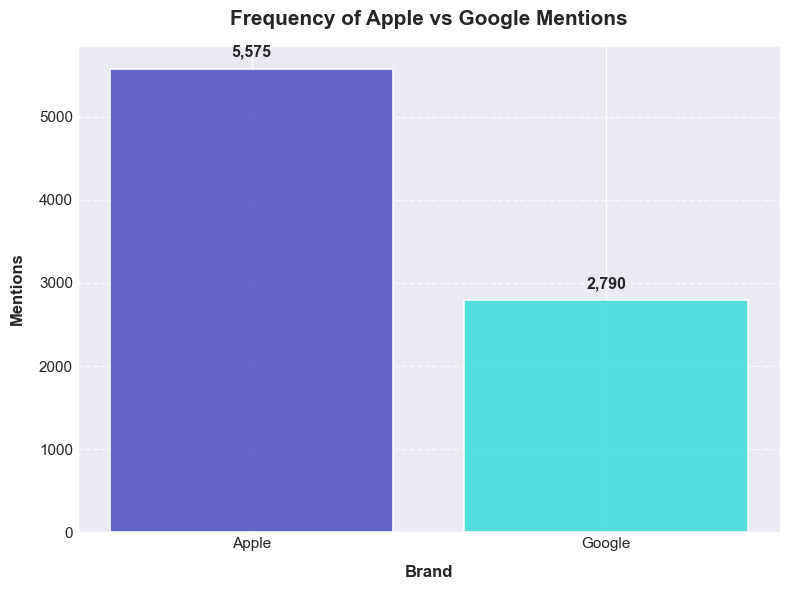

In [522]:
# Data summary
counts = df["product"].value_counts()
print("=== Distribution of Product Mentions ===")
print(counts.to_string())  

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))

brands = counts.index
values = counts.values

# Palette
palette = ["#5E60CE", "#4ADEDE"]

# Bar Plot
bars = ax.bar(
    brands, 
    values, 
    color=palette, 
    edgecolor="white", 
    linewidth=1.2, 
    alpha=0.95
)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (max(values) * 0.02),
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=11.5,
        fontweight="semibold",
    )

# Labels
ax.set_title("Frequency of Apple vs Google Mentions", fontsize=15, fontweight="semibold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold", labelpad=10)
ax.set_ylabel("Mentions", fontsize=12, fontweight="semibold", labelpad=10)

# Grid & Spines
ax.grid(axis='y', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Apple is the most frequently mentioned product in the dataset, indicating a higher level of engagement compared to Google.

### 2. Sentiment Distribution

=== Sentiment Distribution ===
sentiment
neutral     4838
positive    2959
negative     568


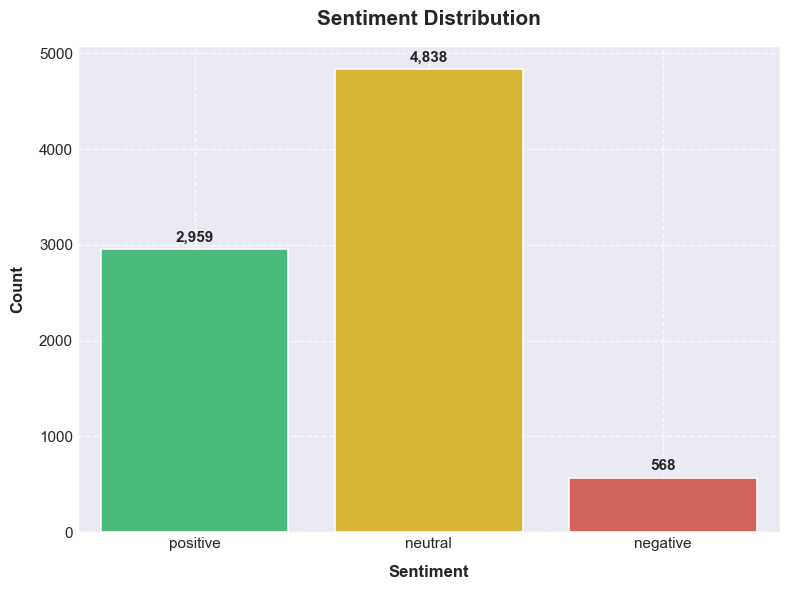

In [523]:
# Map sentiments to simplified categories
df['sentiment'] = df['sentiment'].replace({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
})

# Count summary before plotting
sentiment_counts = df['sentiment'].value_counts()
print("=== Sentiment Distribution ===")
print(sentiment_counts.to_string())

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Palette
palette = {
    'positive': '#2ECC71', 
    'neutral':  '#F1C40F',
    'negative': '#E74C3C'   
}

bars = sns.countplot(
    data=df,
    x="sentiment",
    order=["positive", "neutral", "negative"],
    palette=palette,
    edgecolor="white",
    linewidth=1.2,
    alpha=0.95,
    ax=ax
)

# Annotate Bars
for p in bars.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + (max(sentiment_counts)*0.01),
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="semibold"
    )

# Titles & Labels
ax.set_title("Sentiment Distribution", fontsize=15, fontweight="semibold", pad=15)
ax.set_xlabel("Sentiment", fontsize=12, fontweight="semibold", labelpad=10)
ax.set_ylabel("Count", fontsize=12, fontweight="semibold", labelpad=10)

# Grid & Spines
ax.grid(axis='both', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Most people are sitting on the fence with neutral sentiment. Among those who do have an opinion, it's overwhelmingly positive.

### 3. Top mentioned product per brand

=== Apple Product Mentions ===
  Product  Mentions
     ipad      2513
   iphone      1569
    ipad2       464
   itunes        96
     ipod        24
 facetime         7
   safari         5
     imac         2
lightning         2

=== Google Product Mentions ===
Product  Mentions
android       398
 chrome        12
  nexus         6
  pixel         3
  gmail         2
   nest         1


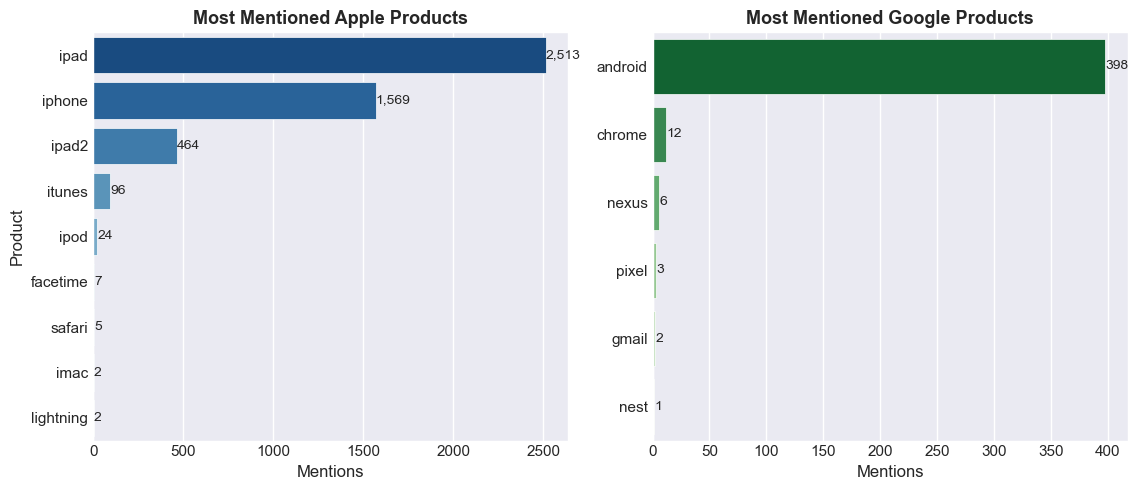

In [524]:
# Define brand-specific keyword lists
apple_keywords = [
        'iphone', 'ipad', 'itunes', 'ipad2', 'macbook air', 
        'ipod', 'ios', 'macbook pro', 'imac', 'siri', 'lightning', 
        'facetime', 'safari'
    ]

google_keywords = [
        'android', 'google maps', 'chrome', 'gmail', 'pixel', 
        'nexus', 'workspace', 'google assistant', 'alexa', 'nest', 
        'google meet', 'duo', 'google ads', 'google pay'
    ]

# Function to count product mentions
def count_mentions(tokens_list, keywords):
    return [token for token in tokens_list if token in keywords]

# Filter mentions per brand
apple_df = df[df["product"] == "Apple"]
google_df = df[df["product"] == "Google"]

apple_mentions = Counter(
    [w for tokens in apple_df["tokens"] for w in count_mentions(tokens, apple_keywords)]
)
google_mentions = Counter(
    [w for tokens in google_df["tokens"] for w in count_mentions(tokens, google_keywords)]
)

# Convert to DataFrames
apple_mentions_df = pd.DataFrame(
    apple_mentions.items(), 
    columns=["Product", "Mentions"]).sort_values(by="Mentions", ascending=False)

google_mentions_df = pd.DataFrame(
    google_mentions.items(), 
    columns=["Product", "Mentions"]).sort_values(by="Mentions", ascending=False)

print("=== Apple Product Mentions ===")
print(apple_mentions_df.to_string(index=False))
print("\n=== Google Product Mentions ===")
print(google_mentions_df.to_string(index=False))

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(11.5, 5))

# Apple plot
sns.barplot(
    data=apple_mentions_df,
    y="Product",
    x="Mentions",
    palette="Blues_r",
    ax=axes[0]
)
axes[0].set_title("Most Mentioned Apple Products", fontsize=13, fontweight="semibold")
axes[0].set_xlabel("Mentions")
axes[0].set_ylabel("Product")

# Annotate Apple bars
for i, bar in enumerate(axes[0].patches):
    axes[0].text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width()):,}",
        va='center',
        ha='left',
        fontsize=10,
    )

# Google plot
sns.barplot(
    data=google_mentions_df,
    y="Product",
    x="Mentions",
    palette="Greens_r",
    ax=axes[1]
)
axes[1].set_title("Most Mentioned Google Products", fontsize=13, fontweight="semibold")
axes[1].set_xlabel("Mentions")
axes[1].set_ylabel("")

# Annotate Google bars
for i, bar in enumerate(axes[1].patches):
    axes[1].text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width()):,}",
        va='center',
        ha='left',
        fontsize=10,
    )

plt.tight_layout()
plt.show()

*Observation:*

- iPad is the star of the show. With 2,513 mentions (plus 464 for ipad2), the iPad accounts for nearly 60% of all Apple product talk. 
- iPhone comes in second but still trails significantly at 1,569 mentions.
- Google means Android. A whopping 94% of Google product mentions are about Android (398 out of 422). 
- Unlike Apple's diverse product portfolio in the conversation, Google is essentially synonymous with their mobile OS here. Chrome, Nexus, and Pixel are afterthoughts.
- The hardware vs software divide. Apple mentions are dominated by hardware (iPad, iPhone, iPod, iMac), while Google's presence is mostly software/OS-based (Android, Chrome).This reflects their brand positioning: Apple as a premium device maker, Google as a platform/software company.
- Newer products barely register. Products like Pixel (3 mentions), Nest (1), and even Apple's FaceTime (7) are virtually invisible. This is because the data is older.
- ipad2 getting 464 separate mentions suggests product-specific conversation happening, not just brand chatter.


=== Top Words for Apple positive ===
  Word  Count
  sxsw   2272
  ipad   1021
 apple    923
  link    916
 store    555
iphone    535
   app    321
  quot    272
austin    265
   new    221

=== Top Words for Apple negative ===
  Word  Count
  sxsw    431
  ipad    194
iphone    160
  quot    127
 apple    123
  link     63
   app     52
 store     47
  like     36
design     29

=== Top Words for Apple neutral ===
  Word  Count
  sxsw   3274
  link   1402
  ipad   1298
 apple   1278
 store    895
iphone    874
austin    518
  quot    450
   pop    364
   amp    299

=== Top Words for Google positive ===
   Word  Count
   sxsw    844
 google    727
   link    291
   quot    192
android    163
    new    138
 circle    124
  party    112
    map    112
 social    102

=== Top Words for Google negative ===
   Word  Count
   sxsw    153
 google    149
   quot     48
   link     39
 circle     36
 social     29
    new     21
 launch     19
android     18
network     17

=== Top Words fo

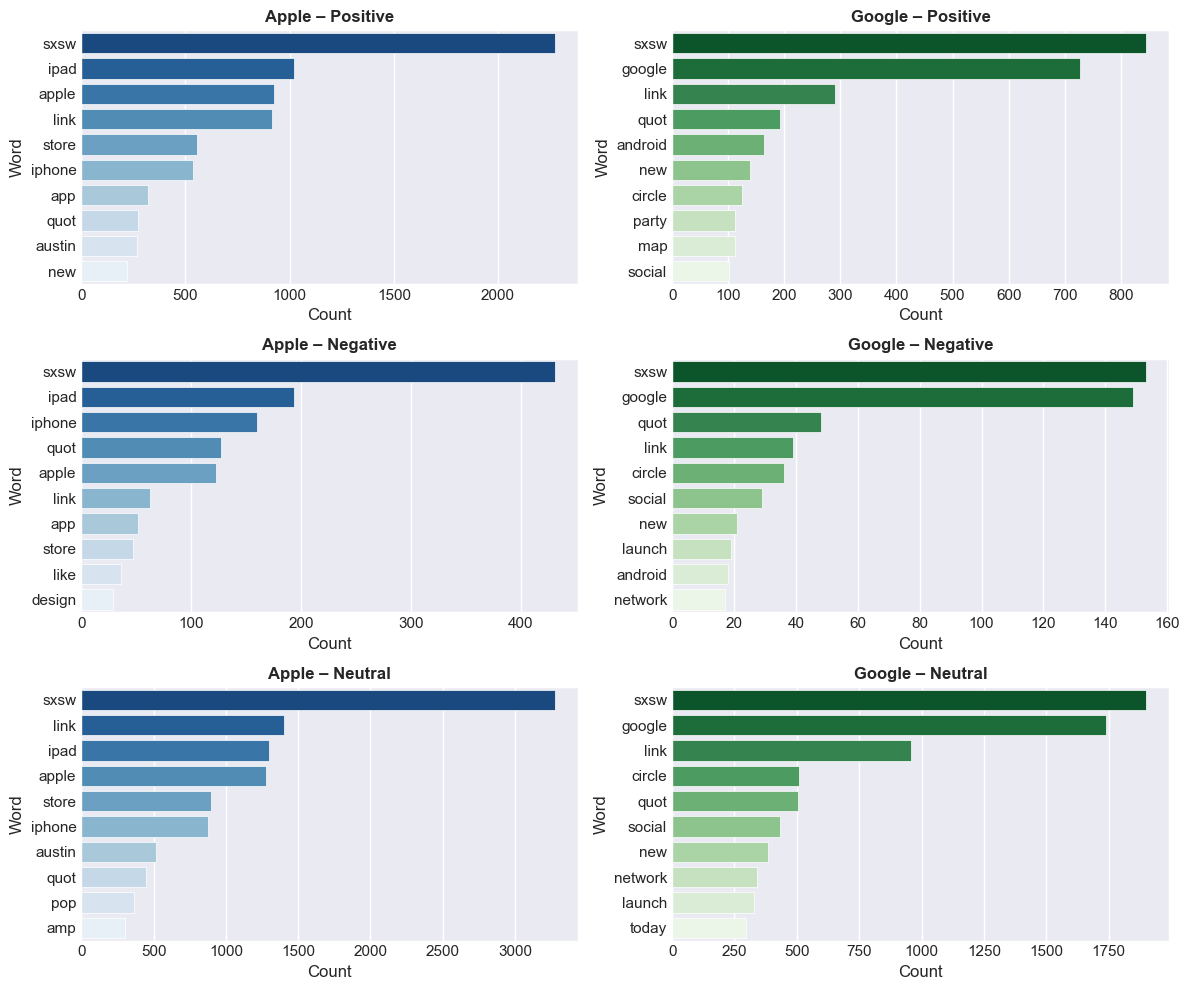

In [ ]:
# Define function to extract top words
def get_top_words(df, brand, sentiment, n=10):
    """Returns the top n most common words for a brand and sentiment."""
    subset = df[(df["product"] == brand) & (df["sentiment"] == sentiment)]
    all_words = " ".join(subset["clean_tweet"]).split()
    counter = Counter(all_words)
    return pd.DataFrame(counter.most_common(n), columns=["Word", "Count"])

# Collect Data
sentiments = ["positive", "negative", "neutral"]
brands = ["Apple", "Google"]

top_words = {}

for brand in brands:
    for sent in sentiments:
        key = f"{brand}_{sent}"
        top_words[key] = get_top_words(df, brand, sent)

# Print out distribution
for key, table in top_words.items():
    print(f"\n=== Top Words for {key.replace('_', ' ')} ===")
    print(table.to_string(index=False))

# Create plot
fig, axes = plt.subplots(len(sentiments), len(brands), figsize=(12, 10))

for col, brand in enumerate(brands):
    for row, sent in enumerate(sentiments):
        key = f"{brand}_{sent}"
        data = top_words[key]

        sns.barplot(
            data=data,
            y="Word",
            x="Count",
            palette="Blues_r" if brand == "Apple" else "Greens_r",
            ax=axes[row, col]
        )

        axes[row, col].set_title(f"{brand} – {sent.capitalize()}", fontsize=12, fontweight="semibold")
        axes[row, col].set_xlabel("Count")
        axes[row, col].set_ylabel("Word")

plt.tight_layout()
plt.show()

=== Sentiment Distribution per Brand ===
product sentiment  Count
  Apple   neutral   3025
  Apple  positive   2133
  Apple  negative    417
 Google   neutral   1813
 Google  positive    826
 Google  negative    151


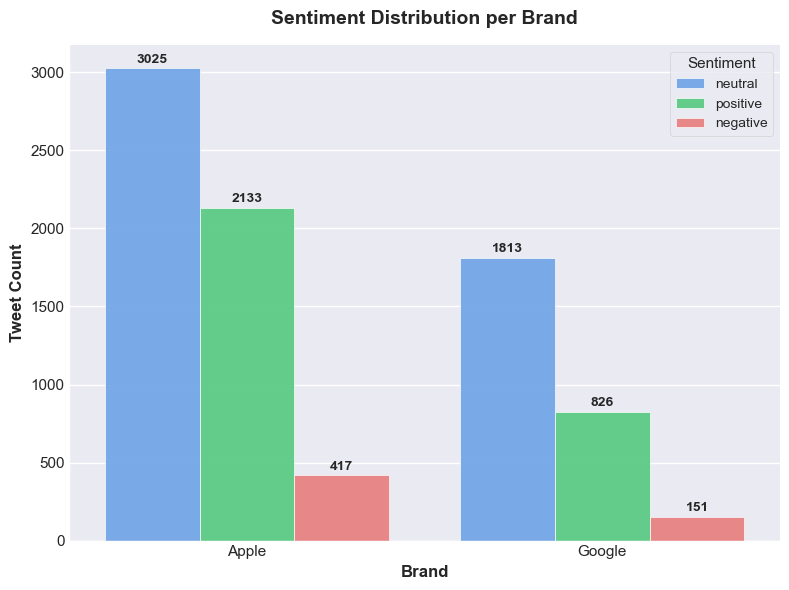

In [ ]:
# Group and Count
sentiment_dist = (
    df.groupby(["product", "sentiment"])
    .size()
    .reset_index(name="Count")
    .sort_values(by=["product", "Count"], ascending=[True, False])
)

print("=== Sentiment Distribution per Brand ===")
print(sentiment_dist.to_string(index=False))

# Visualization
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=sentiment_dist,
    x="product",
    y="Count",
    hue="sentiment",
    palette={"positive": "#4ADE80", "neutral": "#60A5FA", "negative": "#F87171"},
    alpha=0.95,
    edgecolor="white"
)

# Annotate Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2, fontweight='semibold')

# Styling
ax.set_title("Sentiment Distribution per Brand", fontsize=14, fontweight="semibold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold")
ax.set_ylabel("Tweet Count", fontsize=12, fontweight="semibold")
ax.legend(title="Sentiment", title_fontsize=11, fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

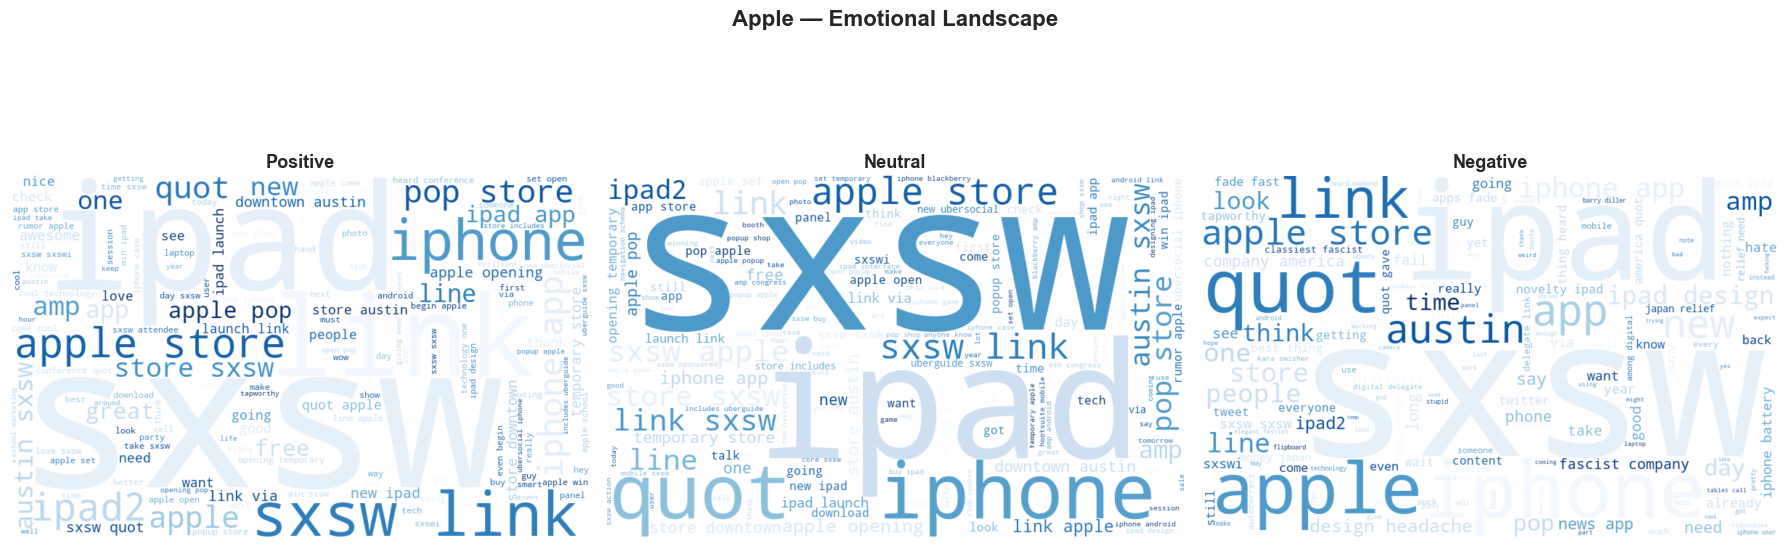

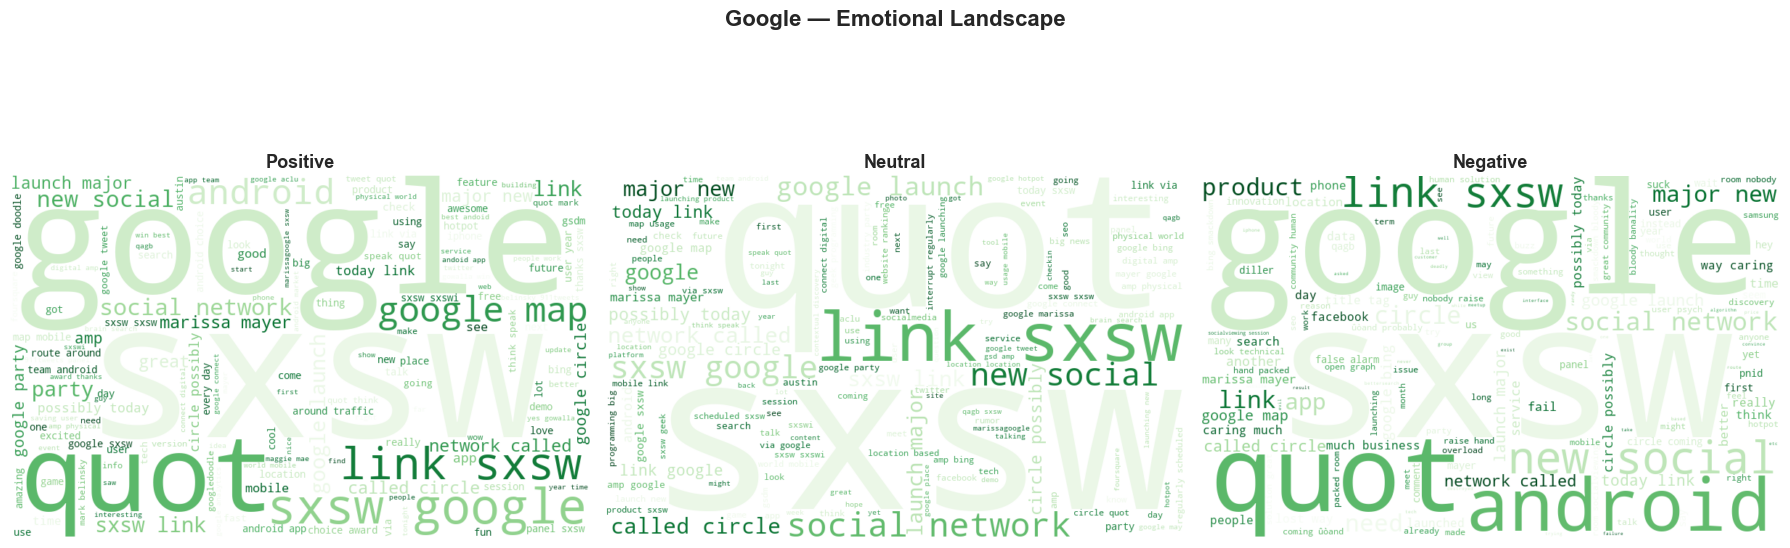

In [ ]:
# Function to generate word clouds
def plot_wordclouds(df, brand, sentiments, ncols=3):
    fig, axes = plt.subplots(1, ncols, figsize=(18, 6), facecolor="white")
    fig.suptitle(f"{brand} — Emotional Landscape", fontsize=16, fontweight="semibold", y=1.05)

    for i, sent in enumerate(sentiments):
        subset = df[(df["product"] == brand) & (df["sentiment"] == sent)]
        text = " ".join(subset["clean_tweet"].astype(str).tolist())

        if not text.strip():
            axes[i].text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
            axes[i].axis("off")
            continue

        wc = WordCloud(
            width=800,
            height=500,
            background_color="white",
            colormap=("Greens" if brand == "Google" else "Blues"),
            max_words=150,
            contour_color="#1e293b",
            contour_width=1.2,
            random_state=42,
        ).generate(text)

        axes[i].imshow(wc, interpolation="bilinear")
        axes[i].set_title(sent.capitalize(), fontsize=13, fontweight="semibold")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Sentiments
sentiments = ["positive", "neutral", "negative"]

# Generate word clouds for both brands
plot_wordclouds(df, "Apple", sentiments)
plot_wordclouds(df, "Google", sentiments)

=== Average Tweet Length per Brand ===
product  tweet_length
 Google     11.248746
  Apple     10.745112

=== Average Tweet Length per Sentiment Class ===
product sentiment  tweet_length
  Apple  negative     11.014388
  Apple  positive     10.733708
  Apple   neutral     10.716033
 Google  negative     11.622517
 Google  positive     11.485472
 Google   neutral     11.109763


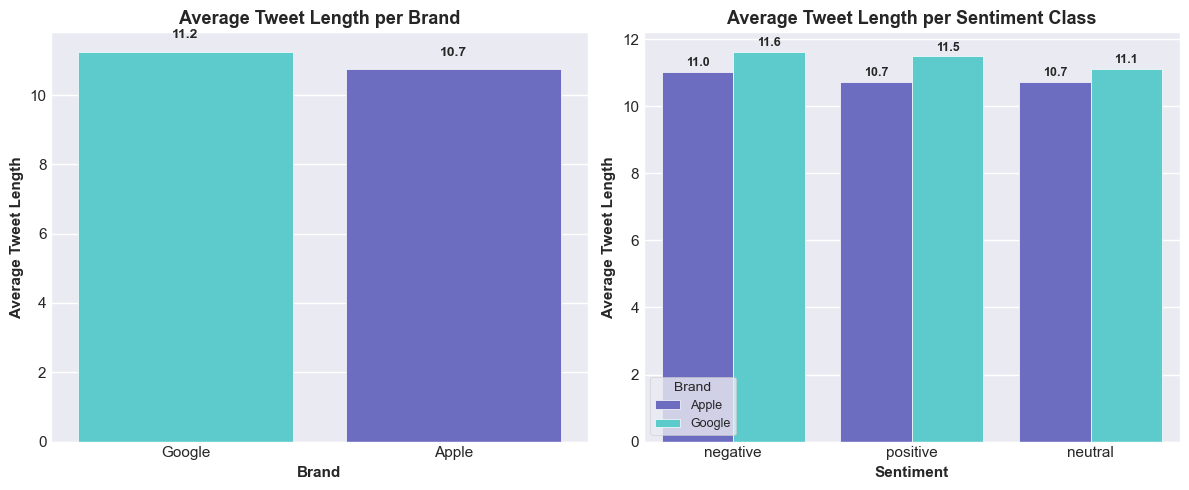

In [ ]:
# Create a copy to avoid modifying the original
tweet_df = df.copy(deep=True)

# Compute tweet length
tweet_df["tweet_length"] = tweet_df["clean_tweet"].astype(str).apply(lambda x: len(x.split()))

# Average tweet length per brand
brand_length = (
    tweet_df.groupby("product")["tweet_length"]
    .mean()
    .reset_index()
    .sort_values(by="tweet_length", ascending=False)
)

print("=== Average Tweet Length per Brand ===")
print(brand_length.to_string(index=False))

# Average tweet length per brand and sentiment
sentiment_length = (
    tweet_df.groupby(["product", "sentiment"])["tweet_length"]
    .mean()
    .reset_index()
    .sort_values(by=["product", "tweet_length"], ascending=[True, False])
)

print("\n=== Average Tweet Length per Sentiment Class ===")
print(sentiment_length.to_string(index=False))

# Create plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average tweet length per brand
sns.barplot(
    data=brand_length,
    x="product",
    y="tweet_length",
    palette=["#4ADEDE", "#5E60CE"],
    ax=axes[0]
)

axes[0].set_title("Average Tweet Length per Brand", fontsize=13, fontweight="semibold")
axes[0].set_xlabel("Brand", fontsize=11, fontweight="semibold")
axes[0].set_ylabel("Average Tweet Length", fontsize=11, fontweight="semibold")

for bar in axes[0].patches:
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        f"{bar.get_height():.1f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="semibold"
    )

# Average tweet length per brand and sentiment
sns.barplot(
    data=sentiment_length,
    x="sentiment",
    y="tweet_length",
    hue="product",
    palette=["#5E60CE", "#4ADEDE"],
    ax=axes[1]
)

axes[1].set_title("Average Tweet Length per Sentiment Class", fontsize=13, fontweight="semibold")
axes[1].set_xlabel("Sentiment", fontsize=11, fontweight="semibold")
axes[1].set_ylabel("Average Tweet Length", fontsize=11, fontweight="semibold")
axes[1].legend(title="Brand", title_fontsize=10, fontsize=9)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f", fontsize=9, padding=2, fontweight="semibold")

plt.tight_layout()
plt.show()

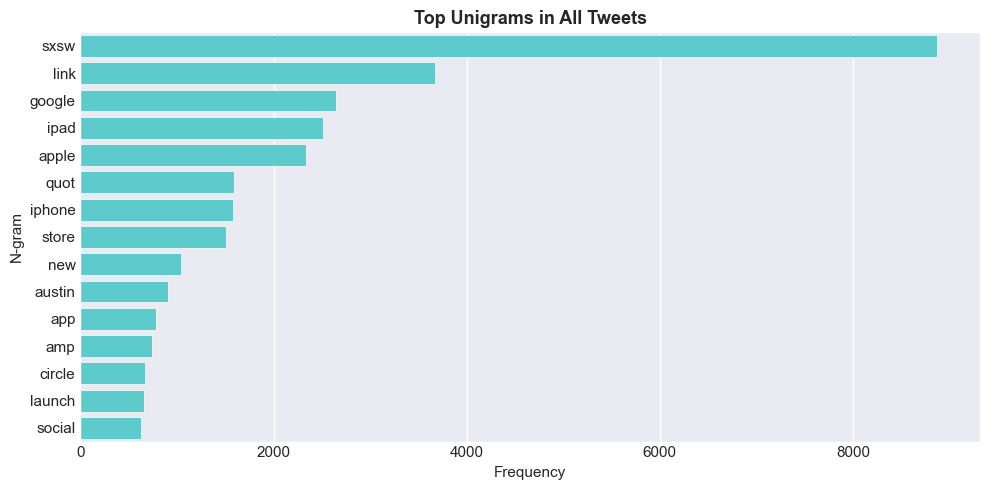

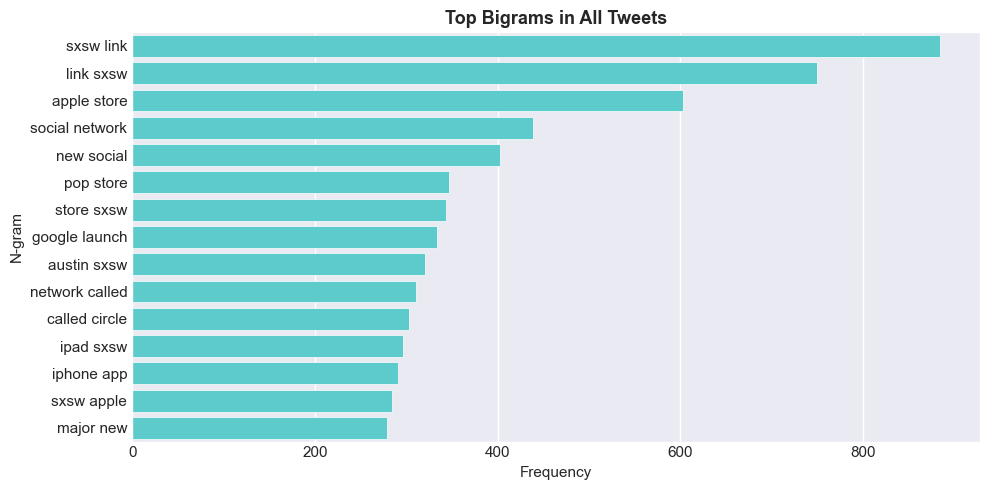

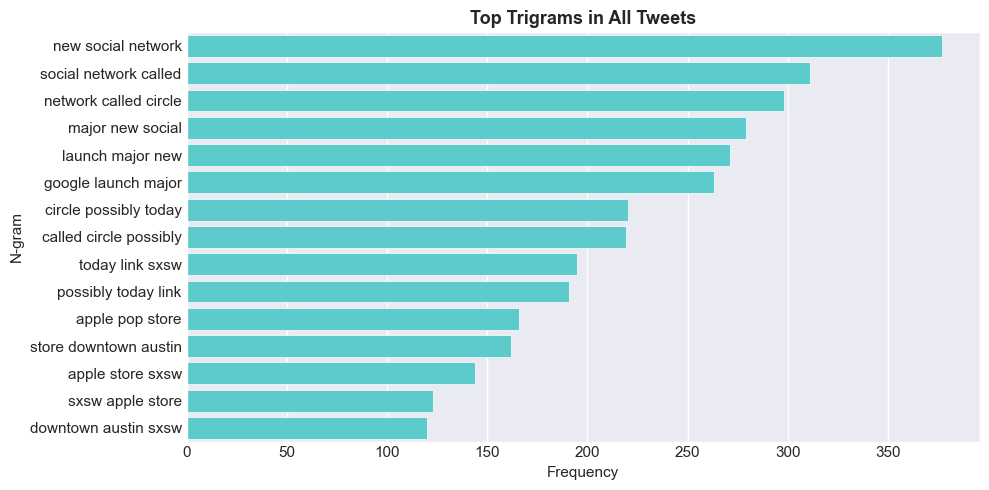


=== APPLE ===


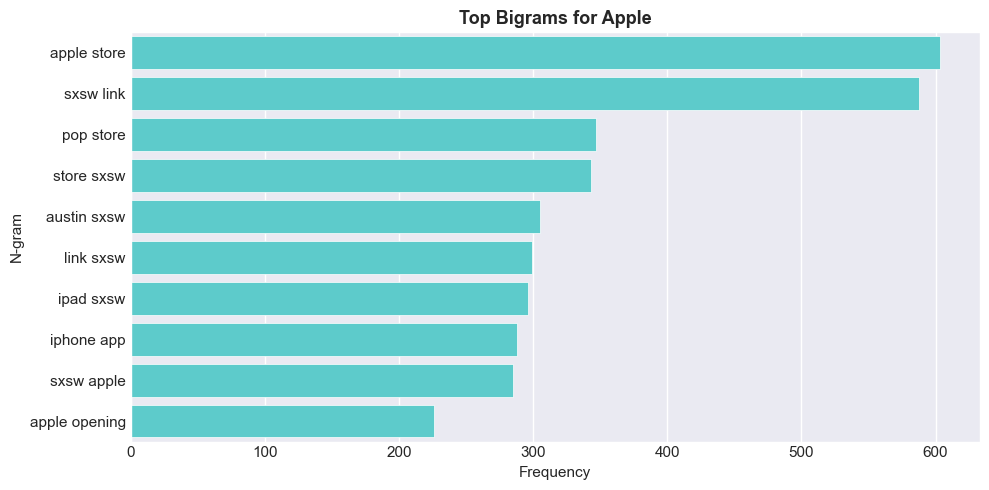


=== GOOGLE ===


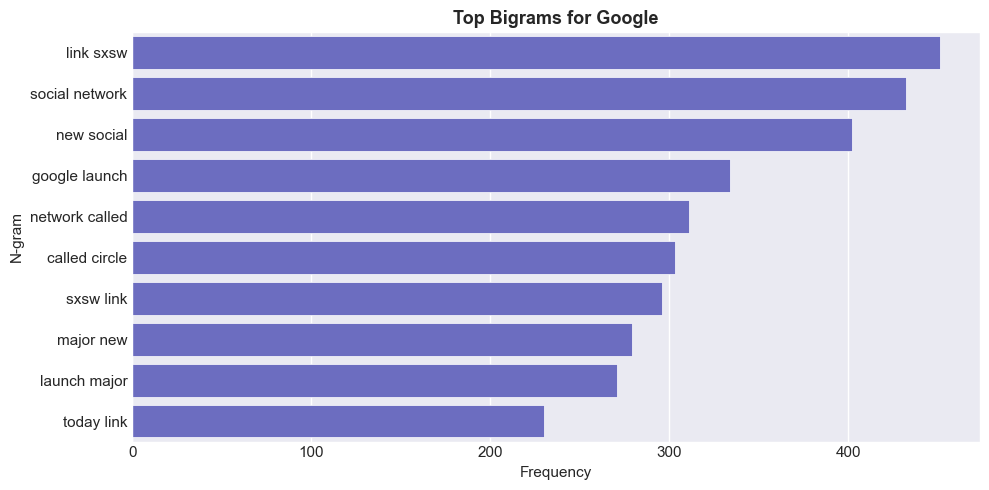

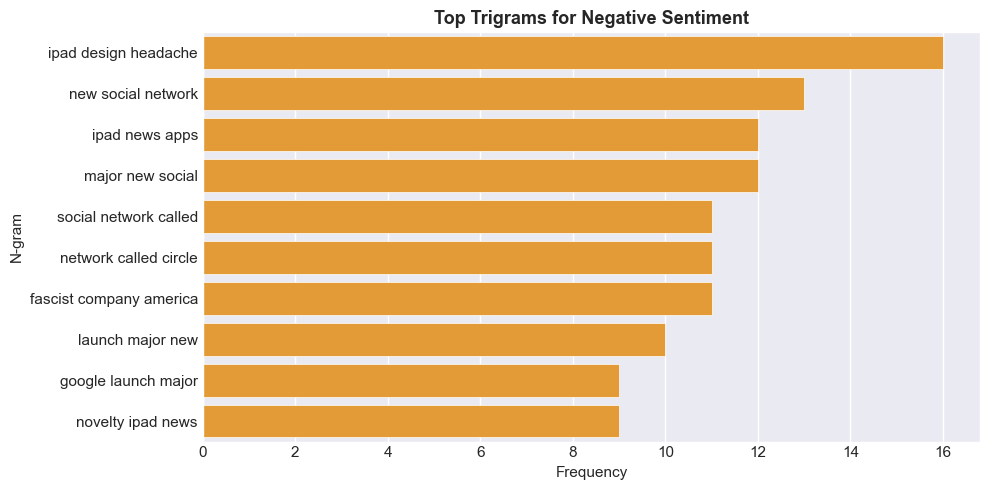

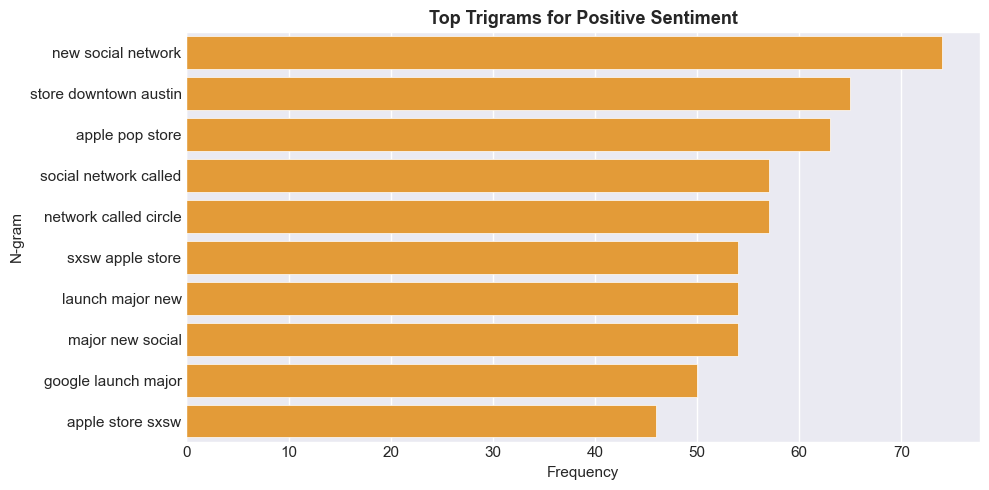

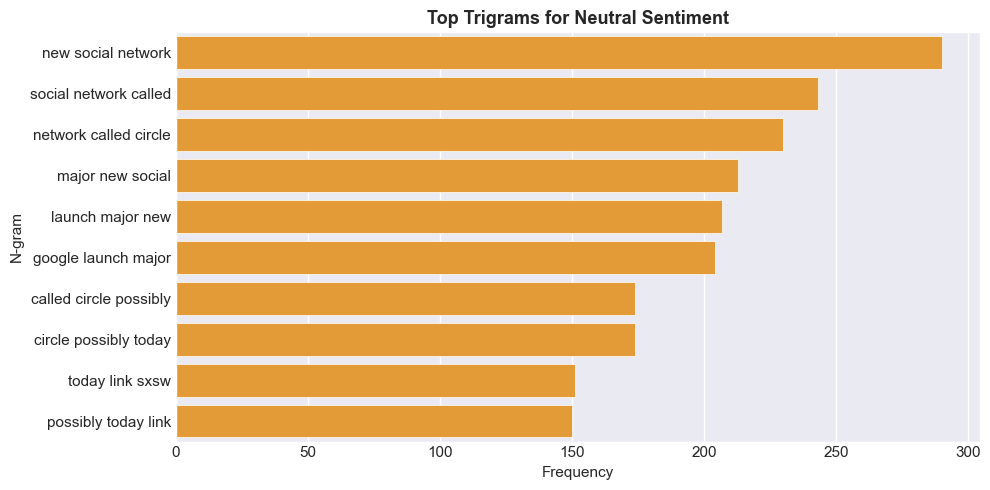

In [ ]:
# Function to extract top n-grams
def get_top_ngrams(corpus, n=1, top_k=15):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:top_k], columns=['ngram', 'count'])

# Visualization function
def plot_ngrams(df_ngram, title, color="#4ADEDE"):
    plt.figure(figsize=(10,5))
    sns.barplot(data=df_ngram, y="ngram", x="count", palette=[color])
    plt.title(title, fontsize=13, fontweight="semibold")
    plt.xlabel("Frequency", fontsize=11)
    plt.ylabel("N-gram", fontsize=11)
    plt.tight_layout()
    plt.show()

# Overall Unigrams, Bigrams, Trigrams
for n, title in zip([1,2,3], ["Unigrams", "Bigrams", "Trigrams"]):
    df_ng = get_top_ngrams(df["clean_tweet"], n=n, top_k=15)
    plot_ngrams(df_ng, f"Top {title} in All Tweets")

# Per Brand 
for brand in df["product"].unique():
    print(f"\n=== {brand.upper()} ===")
    brand_tweets = df[df["product"] == brand]["clean_tweet"]
    bigrams = get_top_ngrams(brand_tweets, n=2, top_k=10)
    plot_ngrams(bigrams, f"Top Bigrams for {brand.title()}", color="#5E60CE" if "google" in brand.lower() else "#4ADEDE")

# Per Sentiment
for sentiment in df["sentiment"].unique():
    sentiment_tweets = df[df["sentiment"] == sentiment]["clean_tweet"]
    trigrams = get_top_ngrams(sentiment_tweets, n=3, top_k=10)
    plot_ngrams(trigrams, f"Top Trigrams for {sentiment.title()} Sentiment", color="#FF9F1C")


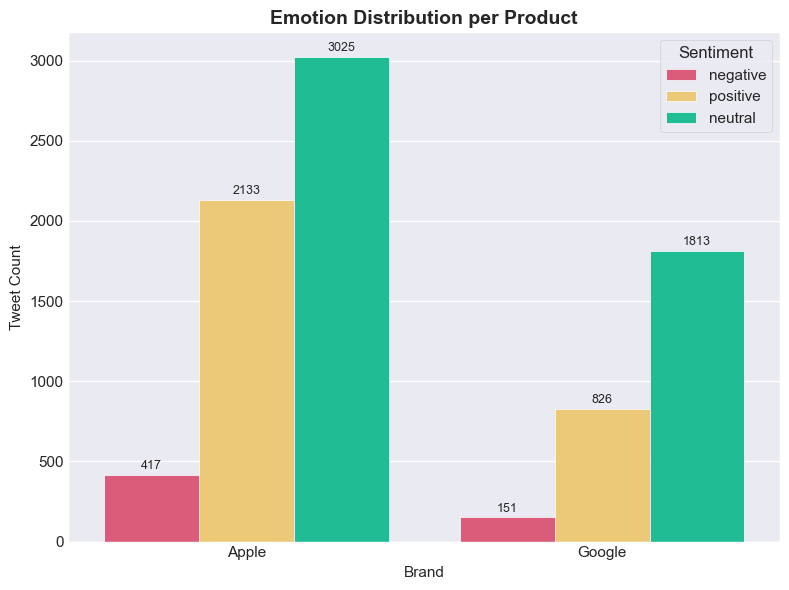


=== Emotion Counts per Product ===
sentiment  negative  neutral  positive
product                               
Apple           417     3025      2133
Google          151     1813       826


In [530]:
plt.figure(figsize=(8,6))

# Countplot of sentiment per product
sns.countplot(
    data=df,
    x="product",
    hue="sentiment",
    palette=["#EF476F", "#FFD166", "#06D6A0"]
)

# Add annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.title("Emotion Distribution per Product", fontsize=14, fontweight="semibold")
plt.xlabel("Brand", fontsize=11)
plt.ylabel("Tweet Count", fontsize=11)
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()

# Optional: Print distribution counts
print("\n=== Emotion Counts per Product ===")
print(df.groupby("product")["sentiment"].value_counts().unstack().fillna(0).astype(int))
